**Authors:** Peter Štrauch, Jozef Hanč, Martina Hančová <br> 
**R consultant:** Andrej Gajdoš <br> 
[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN) *P. J. Šafárik University in Košice, Slovakia* <br> 
email: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)

***
**<font size=6 color=brown> Research study III: In-service teachers</font>** 

**<font size=4> R Shiny $-$  UEQ (User Experience Questionary) evaluation and benchmark plot</font>**  


<font size=4> Computational tool: </font> **<font size=4> R, CRAN libraries, own R functions </font>**

# Data and tools

## R libraries and functions

In [1]:
# use the following commands to install libraries, if it is needed
# packages = c('readxl', psychometric', 'repr', 'scale', 'Hmisc')
# install.packages(packages)

## load CRAN libraries
library(readxl)       # read excel
library(psychometric) # measures - cronbach alpha
library(repr)         # set up figures
require(scales)       # transparent color
library(Hmisc)        # weighted sd, var
# own UEQ functions
source('UEQ_functions.R')

Loading required package: multilevel
Loading required package: nlme
Loading required package: MASS
Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:psychometric’:

    alpha

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:psychometric’:

    alpha


Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



## UEQ characteristics

In [2]:
## UEQ items
print(item_names())

 [1] "annoying/enjoyable"                           
 [2] "not understandable/understandable"            
 [3] "creative/dull"                                
 [4] "easy to learn/difficult to learn"             
 [5] "valuable/inferior"                            
 [6] "boring/exciting"                              
 [7] "not interesting/interesting"                  
 [8] "unpredictable/predictable"                    
 [9] "fast/slow"                                    
[10] "inventive/conventional"                       
[11] "obstructive/supportive"                       
[12] "good/bad"                                     
[13] "complicated/easy"                             
[14] "unlikable/pleasing"                           
[15] "usual/leading edge"                           
[16] "unpleasant/pleasant"                          
[17] "secure/not secure"                            
[18] "motivating/demotivating"                      
[19] "meets expectations/does not meet expecta

In [3]:
## dimensions with items
dimensions()

$Attractiveness
[1]  1 12 14 16 24 25

$Perspicuity
[1]  2  4 13 21

$Efficiency
[1]  9 20 22 23

$Dependability
[1]  8 11 17 19

$Stimulation
[1]  5  6  7 18

$Novelty
[1]  3 10 15 26

In [4]:
## borders for levels in each dimension
benchmark_tab_borders()

,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lower border,-3.00,-3.00,-3.00,-3.00,-3.00,-3.00
bad - below average,0.70,0.64,0.54,0.78,0.50,0.30
below average - above average,1.17,1.08,0.98,1.14,0.99,0.71
above average - good,1.52,1.56,1.47,1.48,1.31,1.05
good - excellent,1.75,1.90,1.78,1.65,1.55,1.40
upper border,3.00,3.00,3.00,3.00,3.00,3.00


## Data preprocesing

In [5]:
# load full results as dataframe
data_shiny <- as.data.frame(read_excel('../data/03_In-service_teachers_UEQ-weighted.xlsx'))

In [6]:
# types of data - structure 
str(data_shiny, list.len = 5)

'data.frame':	33 obs. of  32 variables:
 $ Timestamp                                                                          : POSIXct, format: "2018-06-28 09:56:46" "2018-07-03 12:33:35" ...
 $ ID                                                                                 : chr  "1Bmcf1" "4uTAae" "5C5jjh" "8T3pvG" ...
 $ weight                                                                             : num  471 361 471 361 361 ...
 $ UEQ1                                                                               : num  7 4 6 4 7 5 4 5 5 6 ...
 $ UEQ2                                                                               : num  6 4 6 5 7 5 5 5 4 6 ...
  [list output truncated]


In [7]:
# select only UEQ data
data       <- data_shiny[,4:29]     # 1st column is timestamp, 2nd column is ID of teacher, 3rd column are weights
weights    <- data_shiny$weight

In [8]:
## view data
head(weights,5)
head(data,5)

[1] 471.0833 361.2222 471.0833 361.2222 361.2222

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ17,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,6,1,2,2,6,7,3,5,1,⋯,2,1,1,6,2,6,2,2,2,7
4,4,6,4,1,3,2,4,1,4,⋯,4,6,4,4,4,3,6,6,6,5
6,6,1,4,2,5,5,2,2,1,⋯,6,3,4,6,3,7,2,2,2,7
4,5,4,5,5,3,4,3,5,2,⋯,3,3,3,5,3,5,2,3,4,4
7,7,1,1,1,6,7,4,1,1,⋯,1,1,1,7,2,7,1,1,1,7


## Data wrangling for UEQ benchmark

In [9]:
## rescale data
DT <- rescale_data(data = data)
DT

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ17,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2,3,2,2,2,3,-1,-1,3,⋯,2,3,3,2,2,2,2,2,2,3
0,0,-2,0,3,-1,-2,0,3,0,⋯,0,-2,0,0,0,-1,-2,-2,-2,1
2,2,3,0,2,1,1,-2,2,3,⋯,-2,1,0,2,1,3,2,2,2,3
0,1,0,-1,-1,-1,0,-1,-1,2,⋯,1,1,1,1,1,1,2,1,0,0
3,3,3,3,3,2,3,0,3,3,⋯,3,3,3,3,2,3,3,3,3,3
1,1,-2,0,1,1,2,0,0,1,⋯,1,2,1,0,1,1,1,0,2,1
0,1,2,3,2,0,2,1,1,3,⋯,2,2,1,2,2,2,2,1,2,2
1,1,0,0,-1,1,2,1,-2,2,⋯,2,2,1,2,1,2,1,2,2,3
1,0,1,0,1,1,1,0,0,-1,⋯,0,1,0,0,0,0,1,0,0,0


# Analysis

## Consistency, inconsistency

In [10]:
## reliability
reliability(DT, spec = "whole")
reliability(DT, coef = "lambda")

[1] 0.9565008

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
     0.9140863      0.8116116      0.7554811      0.7736562      0.7482027 
       Novelty 
     0.7965388

In [11]:
## check data for inconstencies
inconsistencies(rescaled_data = DT, spec = "text")

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,critical?
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
no,no,no,yes,no,no,no
no,no,yes,no,yes,yes,strongly suspicious
no,yes,no,no,no,no,no
no,no,no,no,no,no,no
no,no,no,no,no,no,no
no,no,no,no,no,no,no
no,no,no,no,no,no,no
no,no,yes,no,no,no,no
no,no,no,no,no,no,no


In [12]:
## which responces are suggested to be deleted
remove_rows <- inconsistencies(rescaled_data = DT, spec = "remove")
remove_rows

[1]  2 23

In [13]:
## if we want we can remove suspicious responces - just delete "#" sign in the row below
#DT <- DT[-remove_rows,]; DT
#weights <- weights[-remove_rows]; weights

## Analysis of items

In [14]:
## mean values per item
item_mean(DT)

UEQ1      UEQ2      UEQ3      UEQ4      UEQ5      UEQ6      UEQ7      UEQ8 
1.3939394 1.6666667 0.9393939 1.4848485 1.5757576 0.3939394 1.2727273 0.5757576 
     UEQ9     UEQ10     UEQ11     UEQ12     UEQ13     UEQ14     UEQ15     UEQ16 
1.2424242 1.6969697 1.4242424 1.7575758 0.8484848 0.8787879 0.9090909 1.2121212 
    UEQ17     UEQ18     UEQ19     UEQ20     UEQ21     UEQ22     UEQ23     UEQ24 
1.3939394 1.5454545 1.2727273 1.3939394 1.5757576 1.6060606 1.5454545 1.1818182 
    UEQ25     UEQ26 
1.4848485 1.4545455

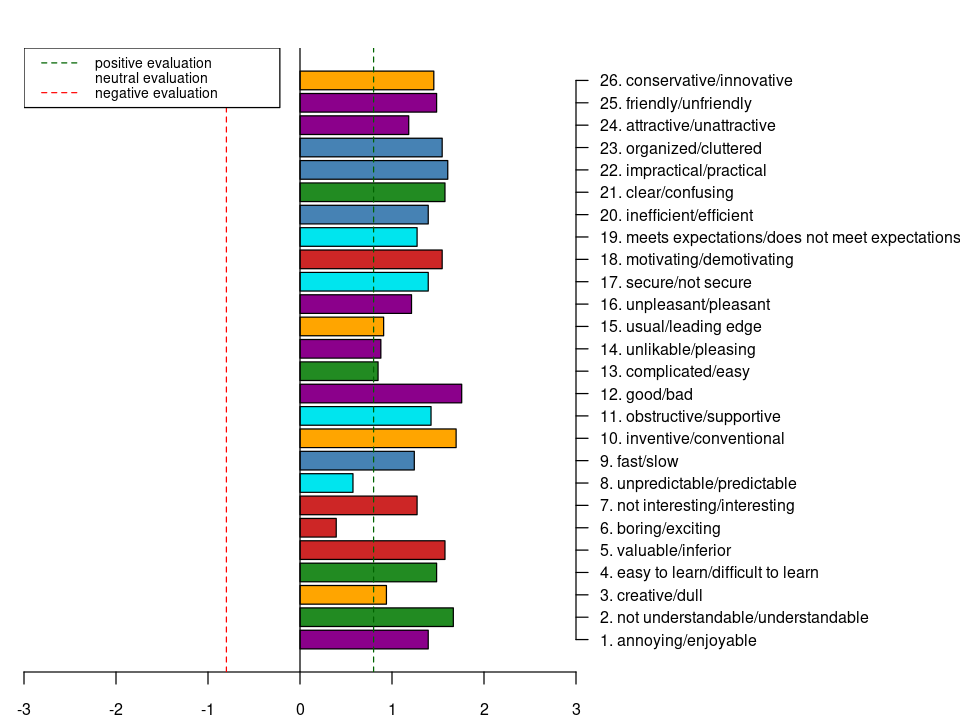

In [15]:
## plot of item means
options(repr.plot.width=8, repr.plot.height=6)
plot_items(rescaled_data = DT)

## Analysis of responses

In [16]:
## means per person
tab <- means_person(rescaled_data = DT)
tab

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.6666667,1.50,1.25,1.75,2.50,3.00
-0.6666667,0.00,0.00,0.00,-0.50,-1.00
1.6666667,0.25,2.25,-0.75,1.25,2.75
0.5000000,0.25,0.75,0.50,-0.25,0.50
2.6666667,2.00,3.00,2.25,2.75,2.75
1.0000000,0.50,0.50,0.75,1.50,0.25
1.0000000,2.00,1.75,1.50,1.50,1.75
1.6666667,0.50,0.75,1.50,1.00,1.75
0.5000000,-0.25,0.25,0.00,1.00,0.00


In [17]:
## mean, standard deviaton and variance for each dimension
dim_means <- dimensions_mean(data = tab, weights = weights)
dim_means

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
      1.284382       1.370661       1.427959       1.112613       1.176290 
       Novelty 
      1.251113

In [18]:
dimensions_deviation(data = tab, weights = weights)

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
     0.9498514      1.0115745      0.9174530      0.9071991      0.9186583 
       Novelty 
     0.9757779

In [19]:
dimensions_sderror(data=tab, weights = weights)

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
     0.1653479      0.1760925      0.1597081      0.1579231      0.1599179 
       Novelty 
     0.1698611

In [20]:
dimensions_variance(data = tab, weights = weights)

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
     0.9022177      1.0232830      0.8417199      0.8230101      0.8439331 
       Novelty 
     0.9521425

In [21]:
## means for grouped dimensions
grouped_dimensions_mean(tab, weights = weights)

Attractiveness Pragmatic Quality   Hedonic Quality 
         1.284382          1.303744          1.213701

## Vizualization and interpretation

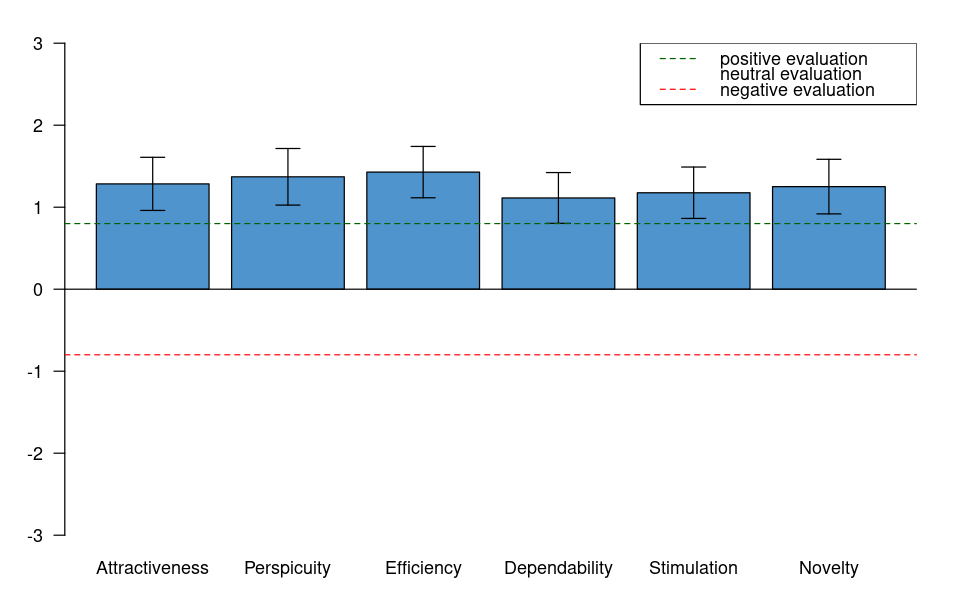

In [22]:
## plot by dimensions
options(repr.plot.width=8, repr.plot.height=5)
plot_dimensions(data = tab, weights = weights)

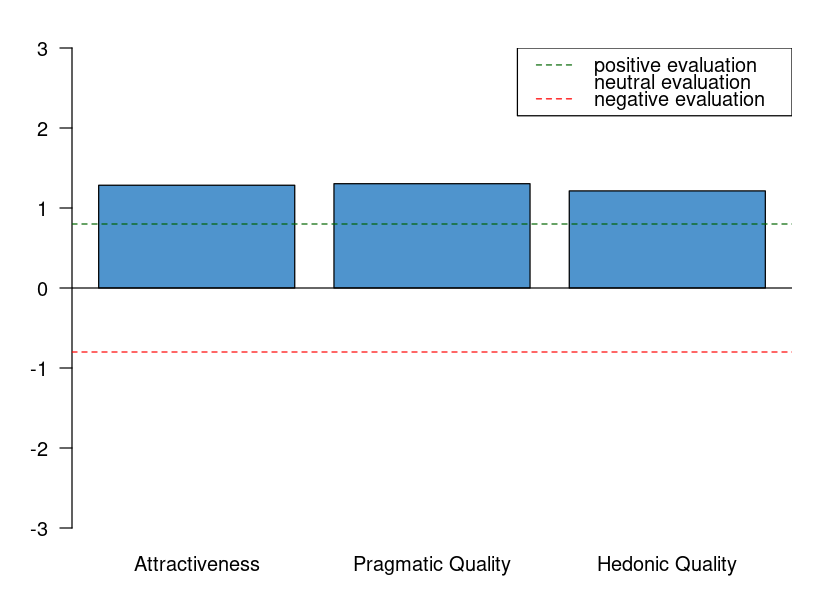

In [23]:
## plot by grouped dimensions
options(repr.plot.width=7, repr.plot.height=5)
plot_grouped_dimensions(tab, weights = weights)

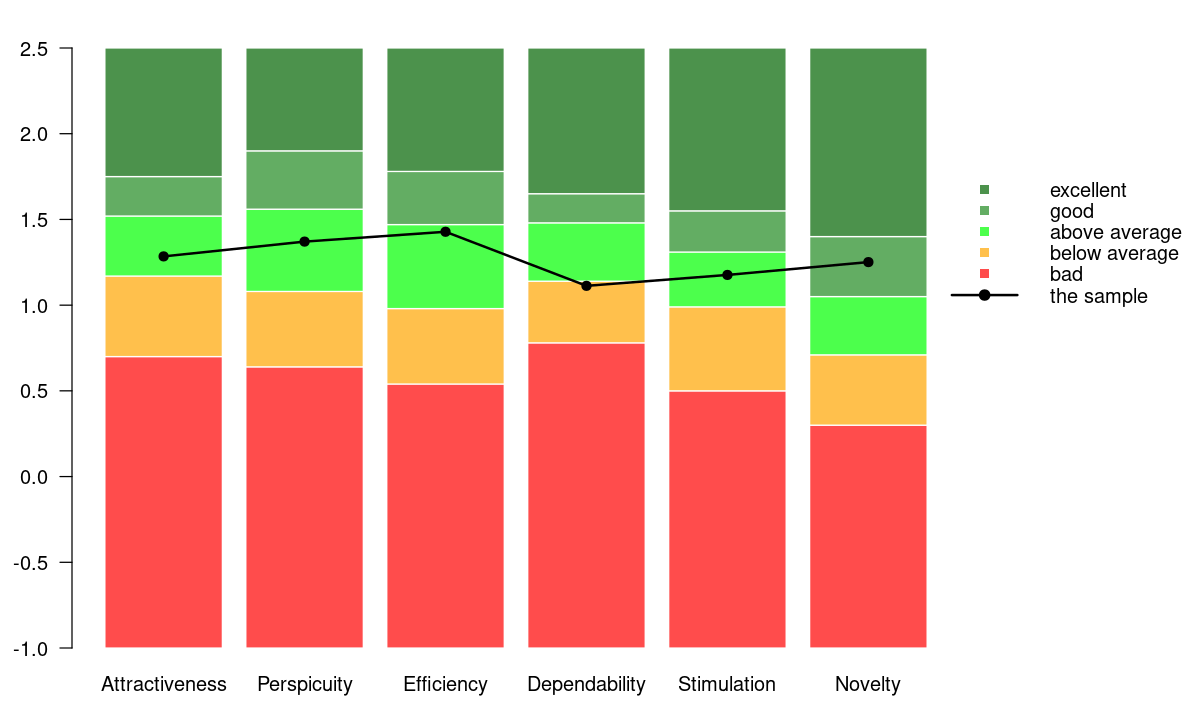

In [24]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab, weights = weights)

In [25]:
## interpretation of results
interpretation(dim_means)

,Mean,benchmark,Interpretation
,<dbl>,<chr>,<chr>
Attractiveness,1.284382,above average,"25% of results better, 50% of results worse"
Perspicuity,1.370661,above average,"25% of results better, 50% of results worse"
Efficiency,1.427959,above average,"25% of results better, 50% of results worse"
Dependability,1.112613,below average,"50% of results better, 25% of results worse"
Stimulation,1.176290,above average,"25% of results better, 50% of results worse"
Novelty,1.251113,good,"10% of results better, 75% of results worse"


## Weighted vs non-weighted

In [26]:
## duplicate data - with and without weights
data_merged <- merge_data(data_1 = data[,1:26], data_2 = data[,1:26], label_1 = "weighted", label_2 = "non-weighted")
weights_merged <- c(weights, rep(1, nrow(data)))

weights_merged
data_merged

[1] 471.0833 361.2222 471.0833 361.2222 361.2222 361.2222 471.0833 361.2222
 [9] 471.0833 375.7273 471.0833 471.0833 375.7273 471.0833 361.2222 375.7273
[17] 375.7273 375.7273 375.7273 187.8636 375.7273 375.7273 361.2222 187.8636
[25] 375.7273 375.7273 471.0833 471.0833 471.0833 471.0833 361.2222 361.2222
[33] 471.0833   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000
[41]   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000
[49]   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000
[57]   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000
[65]   1.0000   1.0000

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,6,1,2,2,6,7,3,5,1,⋯,1,1,6,2,6,2,2,2,7,weighted
4,4,6,4,1,3,2,4,1,4,⋯,6,4,4,4,3,6,6,6,5,weighted
6,6,1,4,2,5,5,2,2,1,⋯,3,4,6,3,7,2,2,2,7,weighted
4,5,4,5,5,3,4,3,5,2,⋯,3,3,5,3,5,2,3,4,4,weighted
7,7,1,1,1,6,7,4,1,1,⋯,1,1,7,2,7,1,1,1,7,weighted
5,5,6,4,3,5,6,4,4,3,⋯,2,3,4,3,5,3,4,2,5,weighted
4,5,2,1,2,4,6,5,3,1,⋯,2,3,6,2,6,2,3,2,6,weighted
5,5,4,4,5,5,6,5,6,2,⋯,2,3,6,3,6,3,2,2,7,weighted
5,4,3,4,3,5,5,4,4,5,⋯,3,4,4,4,4,3,4,4,4,weighted


In [27]:
## rescale data
DT_merged <- rescale_data(data = data_merged)
## calculate means for each dimension
tab_merged <- means_person(rescaled_data = DT_merged, grouping = TRUE)

In [28]:
dimensions_mean(data = tab_merged, grouping = TRUE, weights = weights_merged)

group,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
weighted,1.284382,1.370661,1.427959,1.112613,1.17629,1.251113
non-weighted,1.318182,1.393939,1.446970,1.166667,1.19697,1.250000


In [29]:
dimensions_deviation(data = tab_merged, grouping = TRUE, weights = weights_merged)

group,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
weighted,0.9498514,1.011575,0.9174530,0.9071991,0.9186583,0.9757779
non-weighted,0.9486500,1.005901,0.9137782,0.9178496,0.9265139,0.9882118


In [30]:
dimensions_sderror(data = tab_merged, grouping = TRUE, weights = weights_merged)

group,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
weighted,0.1653479,0.1760925,0.1597081,0.1579231,0.1599179,0.1698611
non-weighted,0.1651388,0.1751049,0.1590684,0.1597771,0.1612854,0.1720256


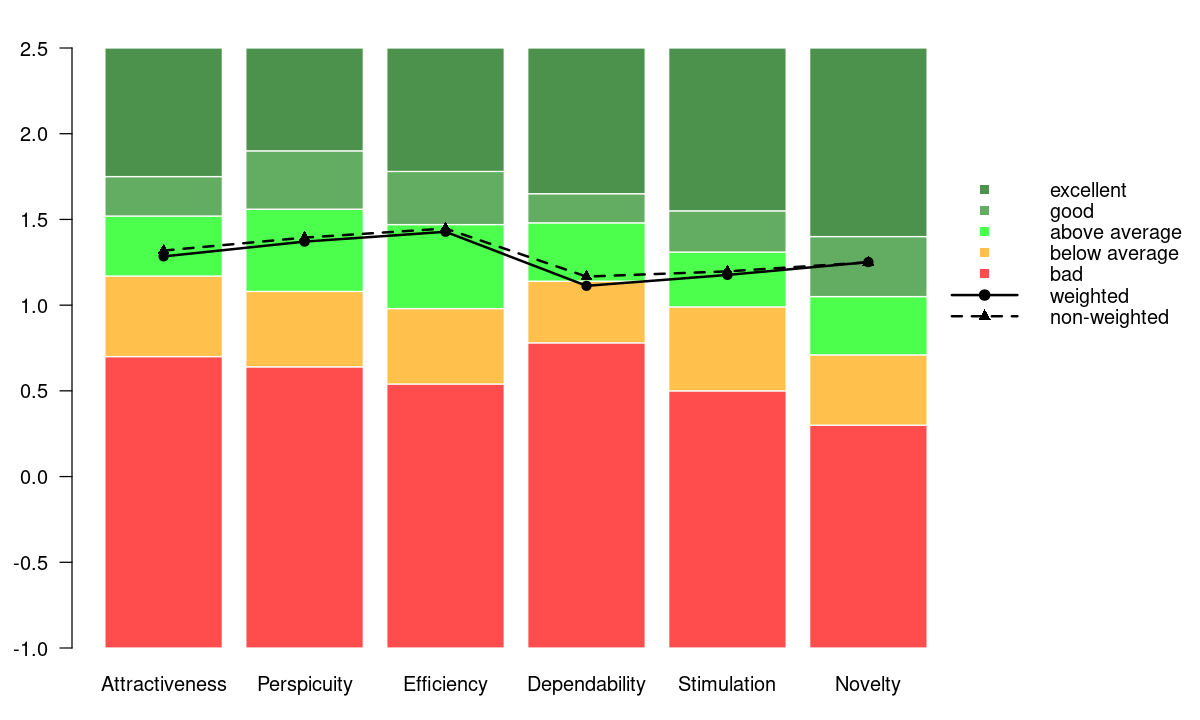

In [31]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_merged, grouping = TRUE, weights = weights_merged)

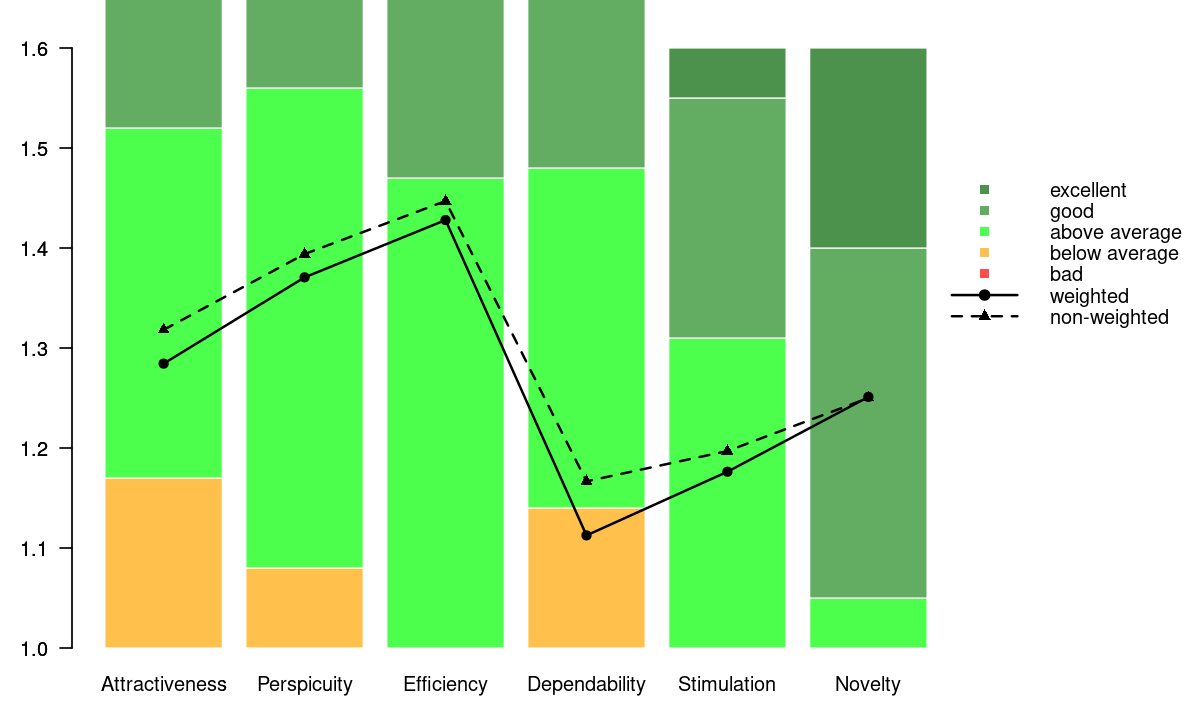

In [32]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_merged, grouping = TRUE, weights = weights_merged, ylim = c(1,1.6) )